<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Разведочный-анализ-данных" data-toc-modified-id="Разведочный-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разведочный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-и-чистка-таблицы-users" data-toc-modified-id="Анализ-и-чистка-таблицы-users-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ и чистка таблицы users</a></span></li><li><span><a href="#Анализ-и-чистка-таблицы-calls" data-toc-modified-id="Анализ-и-чистка-таблицы-calls-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ и чистка таблицы calls</a></span></li><li><span><a href="#Анализ-и-чистка-таблицы-messages" data-toc-modified-id="Анализ-и-чистка-таблицы-messages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ и чистка таблицы messages</a></span></li><li><span><a href="#Анализ-и-чистка-таблицы-internet" data-toc-modified-id="Анализ-и-чистка-таблицы-internet-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ и чистка таблицы internet</a></span></li><li><span><a href="#Анализ-и-чистка-таблицы-tariffs" data-toc-modified-id="Анализ-и-чистка-таблицы-tariffs-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ и чистка таблицы tariffs</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Города-по-тарифам" data-toc-modified-id="Города-по-тарифам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Города по тарифам</a></span></li><li><span><a href="#Визуализация-географии-пользователей" data-toc-modified-id="Визуализация-географии-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация географии пользователей</a></span></li><li><span><a href="#Исследования-предпочтения-тарифов-в-зависимости-от-пола" data-toc-modified-id="Исследования-предпочтения-тарифов-в-зависимости-от-пола-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследования предпочтения тарифов в зависимости от пола</a></span></li><li><span><a href="#Возраст-абонентов" data-toc-modified-id="Возраст-абонентов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Возраст абонентов</a></span></li><li><span><a href="#Анализ-поведения-пользователей" data-toc-modified-id="Анализ-поведения-пользователей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ поведения пользователей</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Интернет</a></span></li></ul></li><li><span><a href="#Подведем-итоги" data-toc-modified-id="Подведем-итоги-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Подведем итоги</a></span><ul class="toc-item"><li><span><a href="#Выручка" data-toc-modified-id="Выручка-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Выручка</a></span></li><li><span><a href="#Поведение-пользователей" data-toc-modified-id="Поведение-пользователей-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Поведение пользователей</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-средних-выборок-тарифа-smart-и-ultra" data-toc-modified-id="Гипотеза-о-равенстве-средних-выборок-тарифа-smart-и-ultra-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза о равенстве средних выборок тарифа smart и ultra</a></span></li></ul></li><li><span><a href="#Общий-итог" data-toc-modified-id="Общий-итог-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий итог</a></span></li><li><span><a href="#Расчет-нового-тарифа" data-toc-modified-id="Расчет-нового-тарифа-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчет нового тарифа</a></span><ul class="toc-item"><li><span><a href="#Соотношения-затрат-услуг-в-тарифах-smart-и-smart+" data-toc-modified-id="Соотношения-затрат-услуг-в-тарифах-smart-и-smart+-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Соотношения затрат услуг в тарифах smart и smart+</a></span></li></ul></li></ul></div>

<a href="https://colab.research.google.com/github/Playmen998/Data-Analysis/blob/master/Analysis_Telecom_Tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: Смарт и Ультра. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф Смарт:

Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:   
*   минута разговора: 3 рубля  
*   сообщение: 3 рубля  
*   1 Гб интернет-трафика: 200 рублей    

Тариф Ультра:

Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль  
* сообщение: 1 рубль  
* 1 Гб интернет-трафика: 150 рублей  
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.  

## Описание данных

**Таблица users (информация о пользователях):**

user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  

**Таблица calls (информация о звонках):**

id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

**Таблица messages (информация о сообщениях):**

id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

**Таблица internet (информация об интернет-сессиях):**

id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

**Таблица tariffs (информация о тарифах):**

tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

# Разведочный анализ данных

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

In [20]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

## Анализ и чистка таблицы users

In [21]:
users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Видим что столбец с датами (reg_date) записан в тип object, приведем к типу данных datetime64

In [23]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [24]:
users.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

Мы видим, что в столбце churn_date у нас огромное кол-во пропусков. В описании к заданию сказано, что "*если значение пропущено, то тариф ещё действовал на момент выгрузки данных*", понимаем, что у большей части еще действует тариф. Оставляем как есть

In [25]:
users.duplicated().sum()

0

Как мы видим дубликатов с таблице нет

## Анализ и чистка таблицы calls

In [26]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [27]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Переведем дату в формат datetime64

In [28]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [29]:
calls.isna().mean()

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

Видим что пропусков нет

In [30]:
calls.duplicated().sum()

0

Дубликатов нет

Добавим столбец месяц к каждому событию

In [31]:
calls['calls_month'] = pd.DatetimeIndex(calls['call_date']).month

<AxesSubplot:>

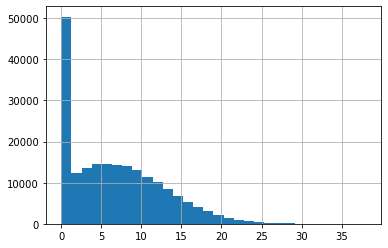

In [32]:
calls['duration'].hist(bins=30)

Большое кол-во звонков длятся меньше 1 мин. Может быть звонки длятся от 0 до 1 минуты?

<AxesSubplot:>

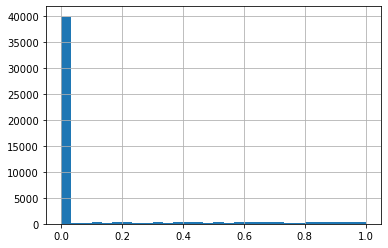

In [33]:
calls.query('duration<=1')['duration'].hist(bins=30)

Нет, большая часть звонков длится 0 сек

In [34]:
calls.query('0==duration')['duration'].count()/len(calls)

0.19551644316336553

Видим что 20% данных таблицы звонок длился 0 минут. Возможно это недозвонившиеся абоненты 

Посмотрим на количество звонков с нулями у двух разных тарифов

In [35]:
users_call = pd.merge(users, calls,
                       how='left', on='user_id')

In [36]:
users_call.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,calls_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.00,7.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.00,8.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85,6.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80,9.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18,12.0


In [37]:
users_call[users_call['duration'] == 0].groupby('tariff')['duration'].agg(['count','mean'])

,count,mean
tariff,,
smart,25669,0.0
ultra,13944,0.0


Больше всего звонков длительностью 0 минут находится в smart, однако посмотрим на среднее значение

In [38]:
sm, ul = users_call['tariff'].value_counts().values

In [39]:
sm_0, ul_0 = users_call[users_call['duration'] == 0]['tariff'].value_counts().values

In [40]:
sm_0/sm

0.19697353376765886

In [41]:
ul_0/ul

0.1928684057650281

Среднее кол-во звонков с длительностью 0 одинаковое как в тарифе smart, так и в ultra. Тут может быть много возможных проблем: инициатива абонента, плохое покрытие сети, "занята" линия звонка, а может быть **технические** проблемы с тарифом. Ведь те звонки, которые не прошли из-за технических проблем, могли потенциально принести прибыль.   

К сожалению предоставленных данных недостаточно, чтобы выяснить проблему большого кол-во звонков длительностью 0 сек. Необходимо узнать по какой причине прерывается связь (из-за чего получаем звонок длительностью 0 минут). Стоит пообщаться с техническим отделом для выявления причины этой проблемы

Так как для нашего дальнейшего исследования звонки продолжительностью 0 минут не несут какого-либо смысла для поставленной задачи (тк не приносят прибыль) заменин их на nan, чтобы не учитывались при подсчете

In [42]:
calls['duration'] = calls['duration'].replace(0, np.NaN)

Теперь округлим все звонки вверх до целого числа

In [43]:
calls['duration'] = calls['duration'].apply(np.ceil)

## Анализ и чистка таблицы messages

In [44]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [45]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Переведем дату в значение datetime64

In [46]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [47]:
messages.isna().mean()

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

Пропусков нет

In [48]:
messages.duplicated().sum()

0

Нет дубликатов

Добавим столбец месяц к каждому событию

In [49]:
messages['messages_month'] = pd.DatetimeIndex(messages['message_date']).month

## Анализ и чистка таблицы internet

In [50]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [51]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Переведем дату в значение datetime64

In [52]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [53]:
internet.isna().mean()

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

Пропусков нет

In [54]:
internet.duplicated().sum()

0

Нет дубликатов

Добавим столбец месяц к каждому событию

In [55]:
internet['internet_month'] = pd.DatetimeIndex(internet['session_date']).month

<AxesSubplot:>

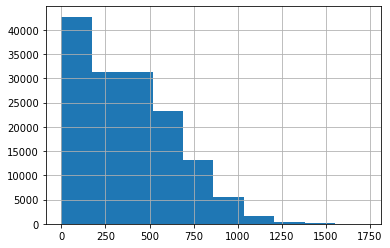

In [56]:
internet['mb_used'].hist()

In [57]:
internet['mb_used'].min()

0.0

На графике видно, что самое большое кол-во сессий не потратила ни одного мб. Посмотрим поближе

<AxesSubplot:>

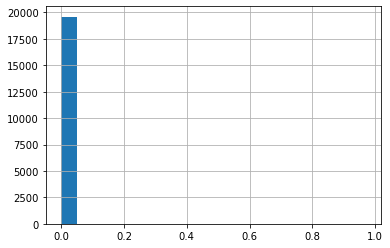

In [58]:
internet.query('mb_used<1')['mb_used'].hist(bins=20)

Как мы видим, огромное кол-во сессий израсходовали 0 МБ интернета. Это может быть связано:
1. Много сессий с 0 МБ из-за технических неполадок
2. Пользователи истратили весь предоставленный пакет интернета  

Посмотрим по тарифам

<AxesSubplot:>

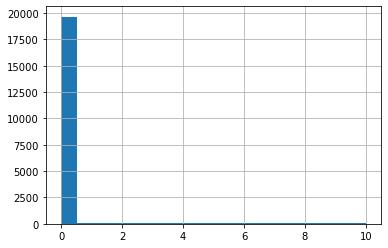

In [59]:
internet.query('mb_used<10')['mb_used'].hist(bins=20)

In [60]:
users_int = pd.merge(users, internet,
                       how='left', on='user_id')

In [61]:
users_int[users_int['mb_used'] == 0].groupby('tariff')['mb_used'].agg(['count'])

,count
tariff,
smart,17823
ultra,1775


Общее количество сессий в которых было потрачено 0 МБ больше у тарифа smart, посмотрим на среднее значение

In [62]:
sm, ul = users_int['tariff'].value_counts().values

In [63]:
sm_0, ul_0 = users_int[users_int['mb_used'] == 0]['tariff'].value_counts().values

In [64]:
sm_0 / sm

0.1597902097902098

In [65]:
ul_0 / ul

0.04688449245886051

Как мы видим в среднем сессий с 0 потраченым интернетом гораздо больше в тарифе smart

Предоставленных данных для исследования гипотезы недостаточно:

В случае 1. гипотезы: по какой причине прерывается доступ к интернету (из-за чего получаем трат MB равных 0). Поможет общение с техническим отделом  
В случае 2. гипотезы: возможно такое большое кол-во сессий с интернетом 0 МБ, может быть из-за того, что пользователям тарифа smart чаще не хватает лимита интернета по тарифу, и  поэтому они чаще покупают дополнительные ГБ, однако у пользователей smart просто нет денег на счету для покупки дополнительной услуги, если деньги снимались бы автоматически. Чтобы исследовать идею с деньгами (то что их нехватает) необходимы данные об остатке на счету и включенной опции автопополнения (при ее наличие), и данные о попытках снятия денег

Так же заменим 0 на nan

In [66]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)

Теперь округлим все звонки до целого числа

In [67]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

## Анализ и чистка таблицы tariffs

In [68]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут, как мы видим, содержится информация о тарифах

# Анализ данных

Наша здачей является понять какой тариф лучше. Для этого сравним поведения пользователей по двум тарифам

## Города по тарифам

In [69]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Приводим данные к нужному виду, чтобы построить график

In [70]:
tab_smart = (users[users['tariff'] == 'smart'].groupby('city')['tariff']
             .agg(['count']).rename(columns = {'count' : 'smart_count'}))

In [71]:
tab_ultra = (users[users['tariff'] == 'ultra'].groupby('city')['tariff']
             .agg(['count']).rename(columns = {'count' : 'ultra_count'}))

In [72]:
fgt = pd.concat([tab_ultra['ultra_count'], tab_smart['smart_count']], axis=1)

In [73]:
fgt = fgt.sort_values(by='smart_count',ascending=False)

In [74]:
fgt.head()

,ultra_count,smart_count
city,,
Москва,32.0,67.0
Санкт-Петербург,9.0,30.0
Казань,1.0,13.0
Новосибирск,5.0,11.0
Омск,4.0,10.0


Отформатировали таблицу

<AxesSubplot:xlabel='city'>

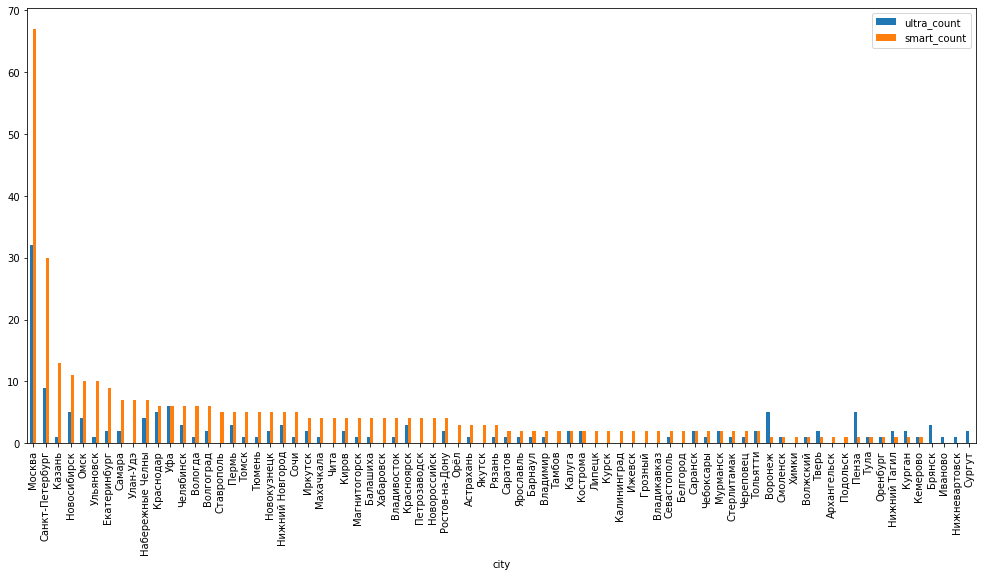

In [75]:
fgt.plot(y=["ultra_count",'smart_count'], kind="bar", figsize=(17,8))

На этом графике четко видно, что большим спросом пользуется тариф smart.

## Визуализация географии пользователей

In [80]:
city_list = users['city']

In [81]:
from tqdm.notebook import tqdm

In [82]:
import requests as r
url = 'https://geocode-maps.yandex.ru/1.x/?apikey=2ddd3291-72fb-42da-b3c2-d643111ecfa7&format=json&geocode='

In [83]:
coordinates_x = []

In [84]:
coordinates_y = []

Получаем по JavaScript API и HTTP Геокодер от Яндекса координаты городов

In [85]:
for city in tqdm(city_list):
  url_formatted = url + city
  response = r.get(url_formatted).json()
  data = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
  coordinate_x = float(data.split()[1])
  coordinate_y = float(data.split()[0])
  coordinates_x.append(coordinate_x)
  coordinates_y.append(coordinate_y)
      

  0%|          | 0/500 [00:00<?, ?it/s]

In [86]:
users["tariff"] = users["tariff"].astype('category')

In [87]:
users["tariff_cat"] = users["tariff"].cat.codes

Сделали кодировку где ultra - 1, smart - 0

In [88]:
city_coor = pd.DataFrame({'Город':city_list, 'Координаты_x':coordinates_x,
                          'Координаты_y':coordinates_y,
                          'tariff_cat':users["tariff_cat"]})

Прибавим к долготе и широте рандомные числа, чтобы наши точки не находились все в одном месте

In [89]:
for i, row in city_coor.iterrows():
  city_coor['Координаты_x'][i] = city_coor['Координаты_x'][i] + np.random.uniform(-1, 1) / 5

C:\Users\lavru\AppData\Local\Temp\ipykernel_9160\3719243825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_coor['Координаты_x'][i] = city_coor['Координаты_x'][i] + np.random.uniform(-1, 1) / 5


In [90]:
for i, row in city_coor.iterrows():
  city_coor['Координаты_y'][i] = city_coor['Координаты_y'][i] + np.random.uniform(-1, 1) / 5

C:\Users\lavru\AppData\Local\Temp\ipykernel_9160\50371016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_coor['Координаты_y'][i] = city_coor['Координаты_y'][i] + np.random.uniform(-1, 1) / 5


In [91]:
loc = city_coor[['Координаты_x','Координаты_y','tariff_cat']]

In [92]:
loc = loc.values

In [93]:
! pip install h3

     -------------------------------------- 855.6/855.6 kB 3.0 MB/s eta 0:00:00


In [95]:
! pip install folium

     -------------------------------------- 102.3/102.3 kB 1.2 MB/s eta 0:00:00


In [96]:
import folium

In [97]:
m = folium.Map(location= [56.838011, 60.597465],zoom_start = 3)

In [98]:
for marker in loc:
  color = 'blue'
  if marker[2] == 1:
    color = 'red'

  folium.CircleMarker(
    location=[marker[0], marker[1]],
    fill = True,
    fill_color=color,
    color = color,
    radius = 3
).add_to(m)

In [99]:
m

Синий - это тариф smart, красный - тариф ultra. Как мы видим на карте синие точки преобладают и имееют большую географию, чем красные точки (ultra). Наши клиенты в основном находятся в европейской части России

## Исследования предпочтения тарифов в зависимости от пола

Определим пол наших пользователей

In [100]:
!pip install pymorphy2

     -------------------------------------- 55.5/55.5 kB 729.7 kB/s eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=ce7da10057faa884299ccaec9725116525f9ecb183c1aca69e1012c2a77bb1fc
  Stored in directory: c:\users\lavru\appdata\local\pip\cache\wheels\4e\29\5e\e5f6f558e24e0d70f6808e3e8fdaf2c04ff597233098afc550
Successfully built docopt


In [101]:
import pymorphy2

In [102]:
morph = pymorphy2.MorphAnalyzer()

In [103]:
name_list = users['first_name'].to_list()

In [104]:
masc_name_list = []
femn_name_list = []


Скрипт распознает женские и мужские имена

In [105]:
for  first_name in name_list:
    parsed_word_list = morph.parse(first_name)
    parsed_word = None

    if len(parsed_word_list) > 1:
        parsed_word_list_filtered = list(filter(lambda x: x.normal_form.lower() == first_name.lower(), parsed_word_list))
        if not parsed_word_list_filtered:
            # Алена -> Алёна
            parsed_word_list_filtered = list(filter(lambda x: x.normal_form.lower() == first_name.lower().replace('е', 'ё'), parsed_word_list))
            if not parsed_word_list_filtered:
                print('Error by parsing name:', first_name)
                continue

            parsed_word = parsed_word_list_filtered[0]
        else:
            parsed_word = parsed_word_list_filtered[0]
    else:
        parsed_word = parsed_word_list[0]

    gender = parsed_word.tag.gender

    if gender == 'masc':
        masc_name_list.append(first_name)
    else:
        femn_name_list.append(first_name)


Error by parsing name: Рустэм
Error by parsing name: Габриель
Error by parsing name: Лукий
Error by parsing name: Таира
Error by parsing name: Рустэм
Error by parsing name: Габриель
Error by parsing name: Габриель
Error by parsing name: Габриель
Error by parsing name: Таира


Те имена, который скрипт не распознал внесем вручную

In [106]:
masc_name_list.extend(['Рустэм','Габриель','Лукий','Рустэм'])

In [107]:
femn_name_list.extend(['Таира'])

In [108]:
users['sex'] =np.nan

In [109]:
for i, _ in users.iterrows():
  if users['first_name'][i] in masc_name_list:
    users['sex'][i] = 'male'
  else:
    users['sex'][i] = 'female'

C:\Users\lavru\AppData\Local\Temp\ipykernel_9160\237859998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['sex'][i] = 'male'


Построим таблицу среднего значения количества мужчин и женщин, которые пользуются тарифом smart и ultra

In [110]:
t = users.groupby(['tariff','sex'])['sex'].agg(['count']).reset_index()

In [111]:
sum = t.groupby('tariff')['count'].agg(['sum'])

In [112]:
t = pd.merge(t,sum, how='inner', on = 'tariff')

In [113]:
t['pct'] = (t['count'] / t['sum'])

In [114]:
t

,tariff,sex,count,sum,pct
0,smart,female,173,351,0.492877
1,smart,male,178,351,0.507123
2,ultra,female,83,149,0.557047
3,ultra,male,66,149,0.442953


Из данной таблицы мы видим, что для тарифа smart соотношения мужчин и женщин приблизительно одинаково. Однако тарифом ultra, чаще пользуются женщины, чем мужчины. Возможно это связано с тем, что женщины чаще пользуются интернетом (соц. сетями, просмотр видео и т.д.) и чаще звонят, поэтому они предпочитают использовать тариф ultra

## Возраст абонентов

<AxesSubplot:>

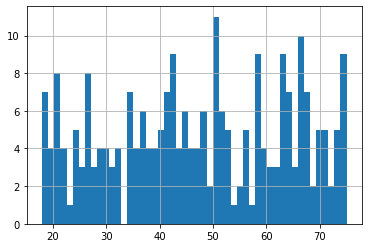

In [115]:
users.query('sex=="male"')['age'].sort_values().hist(bins=50)

In [116]:
users['group_age'] = pd.cut(users['age'], [0,20,30,40,50,60,70,100], 
                            labels=['до 20','20-30','30-40','40-50','50-60','60-70','старше 70'])

In [117]:
pd.DataFrame(users['group_age']).sort_values(by='group_age').value_counts( sort=False)

group_age
до 20        24
20-30        91
30-40        80
40-50        89
50-60        84
60-70        89
старше 70    43
dtype: int64

Распределение возраста в данном случае отличается от нормального(возможно из-за предоставленной выборки). У нас одинаковое кол-во людей в возрастных группах: 20-30, 30-40, 40-50, 50-60, 60-70.

In [118]:
(pd.DataFrame(users.query('tariff=="ultra"')['group_age'])
.sort_values(by='group_age').value_counts( sort=False))

group_age
до 20         8
20-30        28
30-40        23
40-50        25
50-60        23
60-70        28
старше 70    14
dtype: int64

In [119]:
(pd.DataFrame(users.query('tariff=="smart"')['group_age'])
.sort_values(by='group_age').value_counts( sort=False))

group_age
до 20        16
20-30        63
30-40        57
40-50        64
50-60        61
60-70        61
старше 70    29
dtype: int64

По тарифам мы имеем аналогичную ситуацию, как и с возрастом в целом в независимости от тарифов. На таких данных сложно дать уверенные выводы о том какая возрастная категория предпочитает, тот или иной тариф, кол-во наблюдений (пользователей) слишком мало

## Анализ поведения пользователей

### Звонки

Как будем соединять таблицы?  
Для таблицы users мы проставим все месяца от 1 до 12 для каждого пользователя. Таким образом строк будет 6000. Далее к этой таблице через left join мы будем присоединять другие таблицы по столбцам месяца и пользователя, в таком случае не одна строка не потеряется. Далее произведем необходимые расчеты

In [120]:
dates = range(1,13)

In [121]:
users["month"] = [dates] * len(users)

In [122]:
users = users.explode("month")

In [123]:
users.head(13)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_cat,sex,group_age,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,1
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,2
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,3
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,4
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,5
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,6
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,7
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,8
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,9
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,male,50-60,10


Добавили к каждому пользователю месяц от 1 до 12 

In [124]:
t = pd.merge(users[['user_id','tariff','month']], 
               calls[['user_id','duration','calls_month']],
                       how='left', left_on=['user_id','month'],
             right_on=['user_id','calls_month'])

Объединили таблицы users и calls.Посмотрим, все ли данные на месте

In [125]:
t['duration'].sum()

1450301.0

In [126]:
calls['duration'].sum()

1450301.0

Отлично все сходится

Стоит отметить, что пользователи, которые поменяли тариф учитываются. В таблице user_call_dur для пользователей, которые сменили тариф считаются все данные (сумма минут звонков и т.д.) от момента регистрации до смены тарифа. Для других пользователей (кто не менял тариф) данные будут учитыватся от начала и до конца года т.е.  от 1 до 12 месяца

Посчитаем общее кол-во звонков и кол-во потраченых минут за эти звонки

In [127]:
main = t.groupby(['user_id','month'])['duration'].agg(['count','sum']).reset_index()

In [128]:
main[(main['count'] > 0) & (main['sum'] == 0)]

,user_id,month,count,sum


В данной таблице нет значений, это означает, что нет данных в которых кол-во звонков было больше 0, а общая сумма минут таких звонков = 0. Значит, значения count = 0 и sum = 0 при count = 0 можем заменить на np.nan 

In [129]:
main['count'] = main.apply(lambda x: np.nan if x['count'] == 0 else x['count'], axis= 1 )

In [130]:
main['sum'] = main.apply(lambda x: np.nan if (x['sum'] == 0) and 
                         (np.isnan(x['count']) == True) else x['sum'], axis= 1 )

In [267]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Замену сделали правильно

Добавим тарифы к нашей таблице

In [132]:
main = pd.merge(main, users[['user_id','tariff']],
                       how='inner', on='user_id')

Проверим таблицу на наличие дублей

In [133]:
main['sum'].sum()

17403612.0

Да они есть - удалим дубли

In [134]:
main = main.drop_duplicates()

Проверим результат

In [135]:
main['sum'].sum()

1450301.0

In [136]:
calls['duration'].sum()

1450301.0

Отлично все сходится

Теперь добавим всю тарифную сетку к таблице

In [137]:
main = pd.merge(main, tariffs,
                       how='inner', left_on='tariff',right_on = 'tariff_name')

In [268]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Соеденили все верно

Расположим столбцы в удобной последовательности

In [139]:
main = main.reindex(columns=['user_id', 'tariff','month','rub_monthly_fee','count',
                             'sum','minutes_included','rub_per_minute'])

In [140]:
main = main.rename(columns={'sum':'minutes_sum','count':'calls_count'})

In [269]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Посчитаем разницу между потраченными минутами на звонки и лимитом тарифа

In [142]:
main['diff_min'] = main.apply(lambda x: x['minutes_included'] - x['minutes_sum'] 
           if np.isnan(x['minutes_sum']) == False else np.nan, axis = 1)

In [270]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Добавили новый столбец diff_min

<AxesSubplot:>

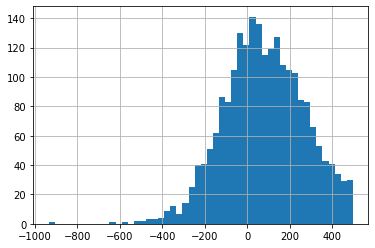

In [144]:
main.query('tariff=="smart"')['diff_min'].hist(bins=50)

Давольно часто пользователи тарифа smart расходовали весь минутный тариф, тем самым платя за каждую минуту тарифа

<AxesSubplot:>

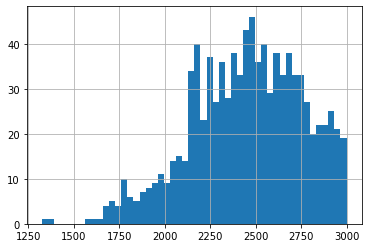

In [145]:
main.query('tariff=="ultra"')['diff_min'].hist(bins=50)

C тарифом ultra пользователи не платили за дополнительные минуты

Теперь найдем общую сумму, которую пользователь потратил за лишние минуты

In [146]:
main['price_add_min'] = (main.apply(lambda x: abs(x['diff_min']*x['rub_per_minute']) 
                                          if x['diff_min'] < 0 else 0, axis=1 ))

In [271]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Посчитали, кол-во рублей, которые абоненты потратили на дополнительные минуты столбец - price_add_min

### Сообщения

Приведем таблицу messages в уднобную форму

In [148]:
t = (messages.groupby(['user_id',"messages_month"])['messages_month']
 .agg(['count'])).reset_index().rename(columns={'count':'mess_count'})

In [272]:
t.head()

tariff,smart,ultra
month,,
1,8524.441176,13153.555556
2,11611.396552,12858.500000
3,15123.857143,17551.972973
4,13479.482143,16843.800000
5,15825.198582,19674.848485


Соеденим таблицу main и подготовленную таблицу t (из messages)

In [150]:
main = pd.merge(main, t,how='left', left_on=['user_id','month'],right_on=['user_id','messages_month'])

Посчитаем, все ли совпадает

In [151]:
main['minutes_sum'].sum()

1450301.0

In [152]:
calls['duration'].sum()

1450301.0

In [153]:
main['mess_count'].sum()

123036.0

In [154]:
len(messages)

123036

Все совпадает

In [155]:
main = main.drop(labels='messages_month',axis=1)

In [156]:
main = pd.merge(main, tariffs[['messages_included','rub_per_message','tariff_name']],
                       how='inner', left_on='tariff',right_on = 'tariff_name')

In [157]:
main = main.drop(labels='tariff_name',axis=1)

In [158]:
main['diff_mess'] = np.nan

In [159]:
for i, _ in main.iterrows():
  if main['mess_count'][i] == np.nan:
    main['diff_mess'][i] = np.nan
  else:
    main['diff_mess'][i] = main['messages_included'][i] - main['mess_count'][i]

C:\Users\lavru\AppData\Local\Temp\ipykernel_9160\2587480406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['diff_mess'][i] = main['messages_included'][i] - main['mess_count'][i]


Посчитаем разницу между кол-во отправленных сообщений абонентами и лимитом тарифа

In [160]:
main['diff_mess'] = main.apply(lambda x: x['messages_included'] - x['mess_count'] 
           if np.isnan(x['mess_count']) == False else np.nan, axis = 1)

In [273]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Посчитали все верно

<AxesSubplot:>

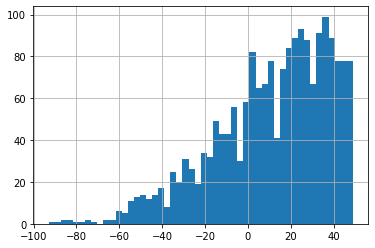

In [162]:
main.query('tariff=="smart"')['diff_mess'].hist(bins=50)

Как мы видим по тарифу smart пользователи достаточно часто превышают лимит отправки

<AxesSubplot:>

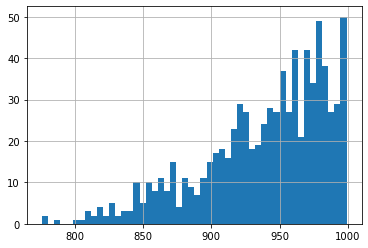

In [163]:
main.query('tariff=="ultra"')['diff_mess'].hist(bins=50)

Для тарифа ultra пользователи не превышают лимит тарифа по отправкам смс

Посчитаем какое кол-во денег пользователи потратили на смс превышающий тарифный план

In [164]:
main['price_add_mess'] = (main.apply(lambda x: abs(x['diff_mess']*x['rub_per_message']) 
                                          if x['diff_mess'] < 0 else 0, axis=1 ))

In [274]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Добавили новый столбец price_add_mess - кол-во рублей, которые пользователи потратили на дополнительные сообщения вне тарифного плана

### Интернет

Приведем таблицу internet к нужному виду

In [166]:
t = (internet.groupby(['user_id',"internet_month"])['mb_used']
 .agg(['count','sum']).reset_index().rename(columns={'count':'int_count','sum':'int_sum_MB'}))

Соединим таблицы main и t (сформированную из internet)

In [167]:
main = pd.merge(main, t,how='left', left_on=['user_id','month'],right_on=['user_id','internet_month'])

Проверим все ли данные сохранились

In [168]:
main['minutes_sum'].sum()

1450301.0

In [169]:
calls['duration'].sum()

1450301.0

In [170]:
main['mess_count'].sum()

123036.0

In [171]:
len(messages)

123036

In [172]:
main['int_sum_MB'].sum()

55369459.0

In [173]:
internet['mb_used'].sum()

55369459.0

Все сходится

Добавим тарифы

In [174]:
main = pd.merge(main, tariffs[['mb_per_month_included','rub_per_gb','tariff_name']],
                       how='inner', left_on='tariff',right_on = 'tariff_name')

In [175]:
main['diff_MB'] = np.nan

In [176]:
for i, _ in main.iterrows():
  if main['int_sum_MB'][i] == np.nan:
    main['diff_MB'][i] = np.nan
  else:
    main['diff_MB'][i] = main['mb_per_month_included'][i] - main['int_sum_MB'][i]

C:\Users\lavru\AppData\Local\Temp\ipykernel_9160\1380714725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['diff_MB'][i] = main['mb_per_month_included'][i] - main['int_sum_MB'][i]


In [177]:
main['diff_MB'] = main.apply(lambda x: x['mb_per_month_included'] - x['int_sum_MB'] 
           if np.isnan(x['int_sum_MB']) == False else np.nan, axis = 1)

In [275]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Все вычесления сделали верно

<AxesSubplot:>

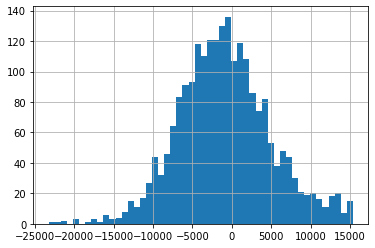

In [179]:
main.query('tariff=="smart"')['diff_MB'].hist(bins=50)

По тарифу smart пользователи часто платят за дополнительные ГБ

<AxesSubplot:>

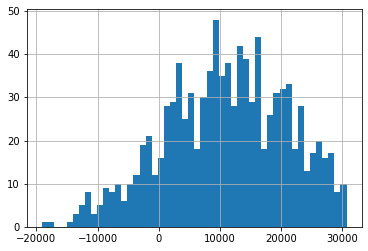

In [180]:
main.query('tariff=="ultra"')['diff_MB'].hist(bins=50)

По тарифу ultra пользователи иногда так же выходят за рамки их тарифа

Посчитаем сколько денег пользователи потратили на дополнительные ГБ

Для начала переведем МБ в ГБ

In [181]:
main['diff_GB'] = main['diff_MB'] /1024

Теперь округлим ГБ, ведь пользователь покупает каждый дополнительный ГБ, который может потратить весь или частично

In [182]:
main['diff_GB_round'] = main['diff_GB'].apply(np.floor)

In [183]:
main['price_add_GB'] = (main.apply(lambda x: abs(x['diff_GB_round']*x['rub_per_gb']) 
                                          if x['diff_GB_round'] < 0 else 0, axis=1 ))

In [276]:
main.head()

,user_id,tariff,month,rub_monthly_fee,calls_count,minutes_sum,minutes_included,rub_per_minute,diff_min,price_add_min,mess_count,messages_included,rub_per_message,diff_mess,price_add_mess,internet_month,int_count,int_sum_MB,mb_per_month_included,rub_per_gb,tariff_name,diff_MB,diff_GB,diff_GB_round,price_add_GB,revenue
0,1000,ultra,1,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
1,1000,ultra,2,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
2,1000,ultra,3,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
3,1000,ultra,4,1950,NaN,NaN,3000,1,NaN,0.0,NaN,1000,1,NaN,0.0,NaN,NaN,NaN,30720,150,ultra,NaN,NaN,NaN,0.0,NaN
4,1000,ultra,5,1950,17.0,159.0,3000,1,2841.0,0.0,22.0,1000,1,978.0,0.0,5.0,4.0,2256.0,30720,150,ultra,28464.0,27.796875,27.0,0.0,1950.0


Получили столбце price_add_GB - кол-во рублей, которые заплатили пользователи за дополнительные ГБ

Убедимся, что все данные сходятся

In [185]:
main['minutes_sum'].sum()

1450301.0

In [186]:
calls['duration'].sum()

1450301.0

In [187]:
main['mess_count'].sum()

123036.0

In [188]:
len(messages)

123036

In [189]:
main['int_sum_MB'].sum()

55369459.0

In [190]:
internet['mb_used'].sum()

55369459.0

Все сходится

## Подведем итоги

### Выручка

Сохраняем таблицу main в result, чтобы в случае форматирования таблицы result данные в таблице main не изменились

In [191]:
result = main

In [192]:
result['revenue'] = result.apply(lambda x: x['rub_monthly_fee'] + x['price_add_min'] + x['price_add_mess'] + x['price_add_GB']
             if np.isnan(x['calls_count']) == False else np.nan, axis=1)

Посмотрим на соотношения абонентов использующие тариф smart и ultra

In [193]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [194]:
users.groupby('tariff')['user_id'].agg(['count'])

,count
tariff,
smart,351
ultra,149


Количество абонентов, использующие тариф smart, гораздо больше, чем пользователей тарифа ultra

Посмотрим на соотношения прибылей

In [195]:
t = result.groupby(['month','tariff'])['revenue'].sum().unstack()

<AxesSubplot:xlabel='month'>

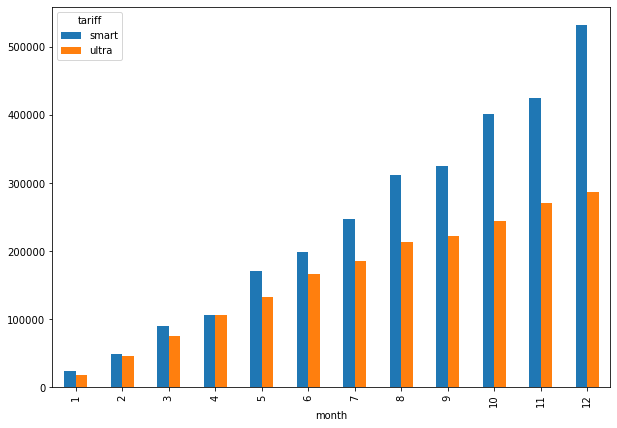

In [196]:
t.plot(y=["smart", "ultra"], kind="bar", figsize=(10,7))

График показывает общую выручку по тарифам за каждый месяц. Тариф smart каждый месяц приносил больше денег, однако это за счет того, что кол-во пользователей тарифом smart больше. Посмотрим на среднюю выручку по месяцам с каждого пользователя

P.S.: Почему с каждым месяцем столбцы графика возрастают? Компания представила такие данные, что в каждом месяце кол-во пользователей практически одинаково, тем самым кол-во операций наслаиваются друг на друга и у нас получается возрастающий график. Тех пользователей, которые сменили тариф достаточно мало, сменна происходила рандомно и, использования тарифа заканчивалось 12 месяцем, тем самым такие данные не повлияют на тенденцию графика

In [197]:
t = result.groupby(['month','tariff'])['revenue'].mean().unstack()

<AxesSubplot:xlabel='month'>

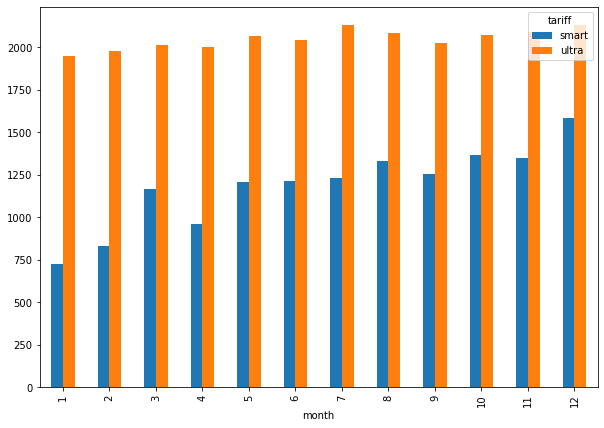

In [198]:
t.plot(y=["smart", "ultra"], kind="bar", figsize=(10,7))

Средняя выручка по месяцам на одного пользователя сильно не менялась у тарифа ultra, для тарифа smart, мы видим колебания т.к. в разные месяцы пользователи тратили разное кол-во денег на покупку дополнительных минут, гб и т.д.

In [199]:
result.groupby('tariff')['revenue'].agg(['mean'])

,mean
tariff,
smart,1295.790635
ultra,2072.439282


Средняя выручка по пользователю за весь 2018 год по тарифу smart = 1295, для тарифа ultra = 2072

In [200]:
result.groupby('tariff')['revenue'].agg(['sum'])

,sum
tariff,
smart,2877951.0
ultra,1962600.0


Тариф smart за 2018 год заработал 2 877951, когда тариф ultra 1 962600

### Поведение пользователей

In [201]:
t = result.groupby(['month','tariff'])['minutes_sum'].mean().unstack()

<AxesSubplot:xlabel='month'>

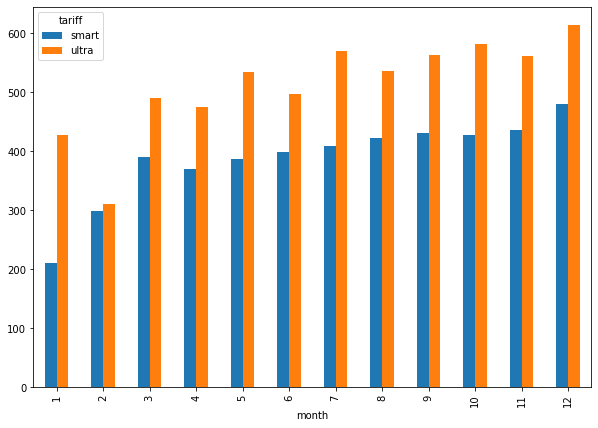

In [202]:
t.plot(y=["smart", "ultra"], kind="bar", figsize=(10,7))

В каждом месяце больше в среднем общаются по телефону пользователи тарифа ultra

In [203]:
total_sum = (result.groupby(['tariff'])['minutes_sum'].mean().values[1] +
result.groupby(['tariff'])['minutes_sum'].mean().values[0])

In [204]:
(result.groupby(['tariff'])['minutes_sum']
 .apply(lambda x: (x.mean() / total_sum)))

tariff
smart    0.433667
ultra    0.566333
Name: minutes_sum, dtype: float64

Пользователи тарифа ultra разговаривают по телефону в среднем на 13% , чем пользователи тарифа smart

PS: Здесь важно считать именно по среднему, тк общее кол-во минут будет больше у тарифа smart из-за большего кол-во пользователей

In [205]:
t = result.groupby(['month','tariff'])['mess_count'].mean().unstack()

<AxesSubplot:xlabel='month'>

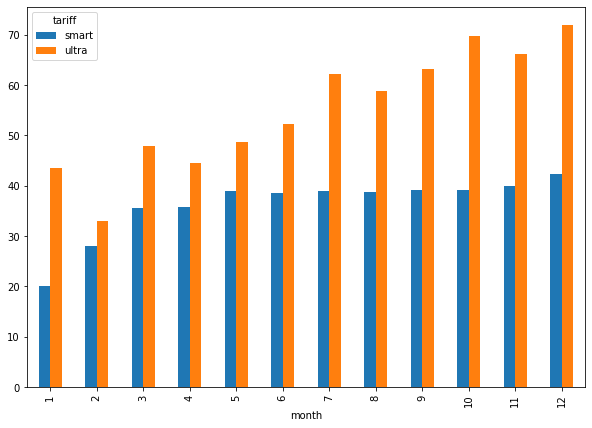

In [206]:
t.plot(y=["smart", "ultra"], kind="bar", figsize=(10,7))

В каждом месяце в среднем больше отправляют сообщения пользователи тарифа ultra

In [207]:
total_sum = (result.groupby(['tariff'])['mess_count'].mean().values[1] +
result.groupby(['tariff'])['mess_count'].mean().values[0])

In [208]:
(result.groupby(['tariff'])['mess_count']
 .apply(lambda x: (x.mean() / total_sum)))

tariff
smart    0.387639
ultra    0.612361
Name: mess_count, dtype: float64

Пользователи тарифа ultra отправляют в среднем в 1,5 раза больше сообщений, чем пользователи тарифа smart

In [209]:
t = result.groupby(['month','tariff'])['int_sum_MB'].mean().unstack()

<AxesSubplot:xlabel='month'>

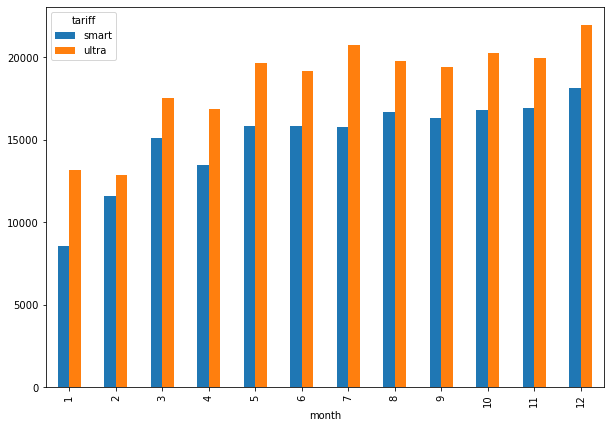

In [210]:
t.plot(y=["smart", "ultra"], kind="bar", figsize=(10,7))

В каждом месяце больше тратять интернет пользователи тарифа ultra

In [211]:
total_sum = (result.groupby(['tariff'])['int_sum_MB'].mean().values[1] +
result.groupby(['tariff'])['int_sum_MB'].mean().values[0])

In [212]:
(result.groupby(['tariff'])['int_sum_MB']
 .apply(lambda x: (x.mean() / total_sum)))

tariff
smart    0.451977
ultra    0.548023
Name: int_sum_MB, dtype: float64

Среднее значения расхода абонента интернета по тарифу ultra выше на 10%, чем среднее значение расхода по тарифу smart

# Проверка гипотез

Подготовим данные для проведения статистических тестов

In [213]:
smart_min = result.query('tariff=="smart"')['minutes_sum'].dropna()

In [214]:
ultra_min = result.query('tariff=="ultra"')['minutes_sum'].dropna()

## Гипотеза о равенстве средних выборок тарифа smart и ultra

H0: нулевая гипотеза предпологает, что разницы нет между тарифами (это одна выборка, которая принадлежит к одной генеральной совокупности, а значит их средние равны)  
H1: альтернативная гипотеза гласит, что это 2 разные выборки, а значит среднее генеральной сосовкупности каждой выборки отличается

Проверим на нормальность распределения данных, для этого воспользуемся критерием Колмогорова-Смирнова и построим график Q-Q plot

In [215]:
smart = result.query('tariff=="smart"')['revenue'].dropna()

In [216]:
ultra = result.query('tariff=="ultra"')['revenue'].dropna()

H0: нулевая гипотеза гласит, что данные распределены нормально  
H1: альтернативная гипотеза гласит, что данные НЕ рапределены нормально

In [217]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats

In [218]:
sm.stats.lilliefors(smart)

(0.1820829309434887, 0.0009999999999998899)

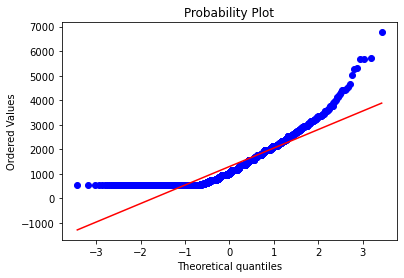

In [219]:
stats.probplot(smart, dist="norm", plot=pylab)
pylab.show()

Как мы видим значение p-value гораздо меньше 0.05, а значит нулевую гипотезу можно отклонить. Эти выводы также подтверждает график Q-Q plot, что означает, что данные распределены не нормально для выборки smart

In [220]:
sm.stats.lilliefors(ultra)

(0.49028604706627316, 0.0009999999999998899)

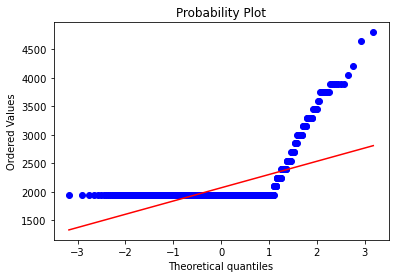

In [221]:
stats.probplot(ultra, dist="norm", plot=pylab)
pylab.show()

По выборке ultra p-value = 0, значит мы отбрасываем нулевую гипотезу. Так же на графике видно, что выборка распределена не нормально

Так как распределения у нас не нормальные воспользуемся непараметрическим тестом Манна-Уитни 

In [222]:
stats.mannwhitneyu(ultra, smart)

MannwhitneyuResult(statistic=1716344.0, pvalue=1.1035244094624725e-179)

p-value < 0.05, значит мы отвергаем нулевую гипотезу и принимаем альтернативную, которая гласит, что выборки различаются друг от друга, а значит представленные данные являются статистичискими значимыми и выборки **явно** принадлежат к разным ГС

# Общий итог

Напомним задание:  

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: Смарт и Ультра. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [239]:
users['tariff'].value_counts(normalize=True)

smart    0.702
ultra    0.298
Name: tariff, dtype: float64

Если наша выборка составлена независимо и является репрезентативной, то пользователей, которые предпочитают тариф smart являются 70% из всей выборки, то конверсия, при проведении маркетинговой кампании, была бы в 2.3 раза больше, чем у тарифа ultra и следовательно за счет этой большой конверсии, тариф smart будет приносить большую прибыль. Однако средняя вырочка на пользователя выше у тарифа *ultra*  
Еще одним аргументом может являться то, что пользователи тарифа smart меньше тратят интернета, меньше отправляют сообщений и звонят по телефону, а значит нагрузка на инфраструктуру оператора будет меньше

 Однако пользователи часто доплачивают за услуги мобильной связи, интернета и сообщений, что может повлечь за собой репутационные риски, абоненты будут недовольны за постоянную переплату по тарифу smart. Попробуем расчитать новый тариф, который будет приносить прибыль сопоставимую со smart, но с большим лимитам по услугам

Дополнительные выводы:  
* Однако тарифом ultra, чаще пользуются женщины, чем мужчины. Конверсия для женщин больше на 10%
* Тариф smart имееют большую географию (пользуюся в большем кол-во городов), чем тариф ultra. Клиенты в большей своей части находятся в европейской части России. В меньшей степени в городах расположенные вдоль транссибирской магистрали и на юге России
* Средняя выручка по пользователю за весь 2018 год по тарифу smart = 1295, для тарифа ultra = 2072
* Тариф smart за 2018 год заработал 2877951, когда тариф ultra 1962600
* Пользователи тарифа ultra разговаривают по телефону больше в среднем на 13% , чем пользователи тарифа smart. Пользователи тарифа ultra отправляют в среднем в 1,5 раза больше сообщений, чем пользователи тарифа smart. Среднее значения расхода абонента интернета по тарифу ultra выше на 10%, чем среднее значение расхода по тарифу smart


Гипотезы для подтверждения, которых не хватает данных  
1. Для расчета возрастов (какой возраст преобладает в том или ином тарифе), необходимо больше данных, отклонения между данными по возрастным категориям незначительны
2. По какой причине прерывается доступ к интернету и мобильной связи (из-за чего получаем трат MB и продолжительностью звонков равных 0). Нужно поговорить с техническим отделом для генерации возможных гипотез и наличие других связанных проблем 
3. Проверка гипотезы, что у абонентов тарифа smart нет денег на счету, поэтому они не могут заплатить за дополнительные ГБ интернета. Чтобы проверить данную гипотезу необходимо данные об остатке на счету и включенной опции автопополнения

# Расчет нового тарифа

<AxesSubplot:>

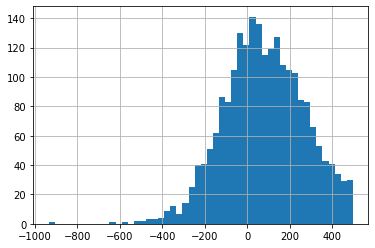

In [240]:
main.query('tariff=="smart"')['diff_min'].hist(bins=50)

<AxesSubplot:>

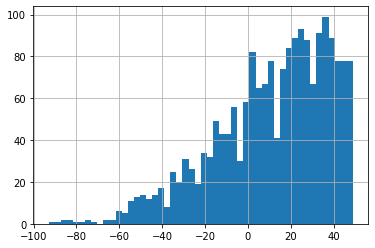

In [241]:
main.query('tariff=="smart"')['diff_mess'].hist(bins=50)

<AxesSubplot:>

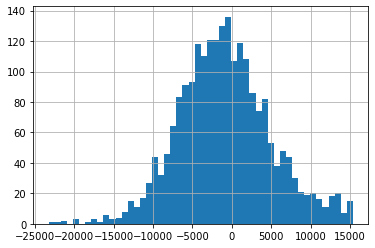

In [242]:
main.query('tariff=="smart"')['diff_MB'].hist(bins=50)

Как мы видим пользователям тарифа smart особенно не хватает больших лимитов по интернету, минутам, в меньшей степени по сообщениям. Посчитаем медианное значение по тем пользователям, которым не хватает услуг

In [243]:
result[(result['diff_min'] < 0 ) | (result['tariff'] == 'smart')]['diff_min'].median()

77.0

Видим, что пользователи, которым не хватает минут на звонки расходуют на 77 минут больше

In [244]:
result[(result['diff_mess'] < 0 ) | (result['tariff'] == 'smart')]['diff_mess'].median()

16.0

Пользователям не хватает около 16 дополнительных сообщений

In [245]:
result[(result['diff_GB_round'] < 0 ) | (result['tariff'] == 'smart')]['diff_GB_round'].median()

-2.0

Абонентам не хватает 2 ГБ интернета

Составим новый тариф и заменим выборку, вместо старого тарифа smart в предоставленной выборки абоненты будут пользоваться тарифом smart+. Мы посчитаем все значения выходящие за пределы тарифа, возьмем выручку суммарную по smart за каждый месяц и посчитаем, сколько должен стоить тариф smart+, чтобы он приносил такую же прибыль, но являлся более гибки для пользователей

Тариф Смарт+:

Ежемесячная плата: X рублей  
Включено 630 минут разговора, 65 сообщений и 17 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

In [246]:
smart_plus = result[result['tariff'] == 'smart'][['user_id','tariff','month','minutes_sum','mess_count','int_sum_MB','revenue']]

Создадим таблицу с тарифом smart+

In [247]:
tariffs_plus = pd.DataFrame([{'messages_included':65,'mb_per_month_included':17408,'minutes_included':630,
                              'rub_per_gb':200,'rub_per_message':3 ,'rub_per_minute':3,'tariff':'smart_plus'}])

In [248]:
tariffs_plus

,messages_included,mb_per_month_included,minutes_included,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,65,17408,630,200,3,3,smart_plus


In [249]:
smart_plus = smart_plus.replace('smart','smart_plus')

In [281]:
smart_plus.head()

,user_id,tariff,month,minutes_sum,minutes_included,rub_per_minute,mess_count,messages_included,rub_per_message,int_sum_MB,mb_per_month_included,rub_per_gb,revenue,min_diff,mes_diff,int_diff,price_add_min,price_add_mes,GB_diff,GB_diff_round,price_add_GB,diff_revenue
0,1001,smart_plus,1,NaN,630,3,NaN,65,3,NaN,17408,200,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,1001,smart_plus,2,NaN,630,3,NaN,65,3,NaN,17408,200,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2,1001,smart_plus,3,NaN,630,3,NaN,65,3,NaN,17408,200,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
3,1001,smart_plus,4,NaN,630,3,NaN,65,3,NaN,17408,200,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
4,1001,smart_plus,5,NaN,630,3,NaN,65,3,NaN,17408,200,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN


In [251]:
smart_plus = pd.merge(smart_plus,tariffs_plus, how = 'inner', on='tariff')

In [252]:
smart_plus = smart_plus.reindex(columns=['user_id', 'tariff','month','minutes_sum','minutes_included',
                             'rub_per_minute','mess_count','messages_included',
                            'rub_per_message','int_sum_MB','mb_per_month_included',
                            'rub_per_gb','revenue'])

Создали таблицу smart_plus и расположили столбцы удобным способом

Посчитаем разницу между кол-во потраченных минут, сообщений и мб пользователей и лимитом тарифа smart+

In [253]:
smart_plus['min_diff'] = smart_plus['minutes_included'] - smart_plus['minutes_sum']

In [254]:
smart_plus['mes_diff'] = smart_plus['messages_included'] - smart_plus['mess_count']

In [255]:
smart_plus['int_diff'] = smart_plus['mb_per_month_included'] - smart_plus['int_sum_MB']

Посчитаем рубли, которые пользователи потратили за дополнительные услуги

In [256]:
smart_plus['price_add_min'] = (smart_plus.apply(lambda x: abs(x['rub_per_minute']*x['min_diff']) 
                                          if x['min_diff'] < 0 else 0, axis=1 ))

In [257]:
smart_plus['price_add_mes'] = (smart_plus.apply(lambda x: abs(x['rub_per_message']*x['mes_diff']) 
                                          if x['mes_diff'] < 0 else 0, axis=1 ))

In [258]:
smart_plus['GB_diff'] = smart_plus['int_diff'] /1024

In [259]:
smart_plus['GB_diff_round'] = smart_plus['GB_diff'].apply(np.floor)

In [260]:
smart_plus['price_add_GB'] = (smart_plus.apply(lambda x: abs(x['GB_diff_round']*x['rub_per_gb']) 
                                          if x['GB_diff_round'] < 0 else 0, axis=1 ))

Расчитаем стоимось тарифа

In [261]:
smart_plus["diff_revenue"] = smart_plus['revenue'] - (smart_plus['price_add_min'] + smart_plus['price_add_mes'] + smart_plus['price_add_GB'])

In [262]:
smart_plus["diff_revenue"].mean()

865.3336334984241

Данный тариф должен стоить около 865 рублей, чтобы он приносил те же деньги, однако **конверсия в тариф smart+ должна быть сопоставима с тарифом smart**

## Соотношения затрат услуг в тарифах smart и smart+

Посмотрим на соотношения людей, в smart и smart+

In [263]:
smart = result[result['tariff'] == 'smart']

Напишем функцию, которая считает процент месяцев, когда пользователь выходил за пределы тарифа

In [264]:
def pct_out(table):
  if table['tariff'].values[0] == 'smart':
    cnt_diff_min_less = table[table['diff_min'] < 0 ]['diff_min'].count()
    cnt_diff_min_greater = table[table['diff_min'] > 0]['diff_min'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print('Тариф Smart')
    print("\n")
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по минутам: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по минутам: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')

    cnt_diff_min_less = table[table['diff_mess'] < 0 ]['diff_mess'].count()
    cnt_diff_min_greater = table[table['diff_mess'] > 0]['diff_mess'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по сообщениям: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по сообщениям: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')

    cnt_diff_min_less = table[table['diff_GB_round'] < 0 ]['diff_GB_round'].count()
    cnt_diff_min_greater = table[table['diff_GB_round'] > 0]['diff_GB_round'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по ГБ интернета: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по ГБ интернета: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')
  elif table['tariff'].values[0] == 'smart_plus':
    cnt_diff_min_less = table[table['min_diff'] < 0 ]['min_diff'].count()
    cnt_diff_min_greater = table[table['min_diff'] > 0]['min_diff'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print('Тариф Smart Plus')
    print("\n")
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по минутам: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по минутам: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')

    cnt_diff_min_less = table[table['mes_diff'] < 0 ]['mes_diff'].count()
    cnt_diff_min_greater = table[table['mes_diff'] > 0]['mes_diff'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по сообщениям: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по сообщениям: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')

    cnt_diff_min_less = table[table['GB_diff_round'] < 0 ]['GB_diff_round'].count()
    cnt_diff_min_greater = table[table['GB_diff_round'] > 0]['GB_diff_round'].count()
    sum_count = cnt_diff_min_less + cnt_diff_min_greater
    print(f'Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по ГБ интернета: {round(cnt_diff_min_less/sum_count,2)*100}')
    print(f'Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по ГБ интернета: {round(cnt_diff_min_greater/sum_count,2)*100}')
    print('\n')

In [265]:
pct_out(smart_plus)

Тариф Smart Plus


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по минутам: 13.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по минутам: 87.0


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по сообщениям: 17.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по сообщениям: 83.0


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по ГБ интернета: 46.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по ГБ интернета: 54.0




In [266]:
pct_out(smart)

Тариф Smart


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по минутам: 34.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по минутам: 66.0


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по сообщениям: 30.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по сообщениям: 70.0


Процент месяцев, когда абонент ВЫХОДИЛ за лимит тарифа по ГБ интернета: 63.0
Процент месяцев, когда абонент НЕ ВЫХОДИЛ за лимит тарифа по ГБ интернета: 37.0




По всем показателям тарифа smart_plus, кол-во месяцев, где пользователь вышел за пределы тарифа значительно уменьшилось по сообщениям и звонкам. По интернету мы имеем очень большой разброс данных, поэтому разница не так сильно бросается в глаза